# Prompt:
The marketing ops team sent over this spreadsheet containing four years of data from a CRM system.

The team wants to find the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its clients?



In [1]:
# Import the pandas and matplotlib packages
import pandas as pd
import matplotlib.pyplot as plt

# Set the working directory
%cd C:\Users\Ben\Desktop\UNH Classes\Job Search

C:\Users\Ben\Desktop\UNH Classes\Job Search


In [2]:
# Read file into memory
data = pd.read_csv("HireArt.csv", sep="\t")

# Change Date of Contact column to pandas datetime
data['Date of Contact'] = pd.to_datetime(data['Date of Contact'])
data['Date of Contact'] = data['Date of Contact'].dt.date

# Inspect the dataframe (first 5 rows)
data.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [3]:
# Look to see how many unique client names there are in total
data['Client Name'].nunique()

35

In [4]:
# Set date as index
data.set_index(pd.DatetimeIndex(data['Date of Contact']),inplace=True)

# Drop date column since the index is now the date
data = data.drop(['Date of Contact'],axis=1)
data.head()


,Account manager,Client Name
Date of Contact,,
2015-10-31,Milan Crona,"Wyman, Farrell and Haag"
2013-12-15,Aidan Pouros,"Veum, McClure and Schuster"
2013-12-07,Aidan Pouros,"Veum, McClure and Schuster"
2013-11-02,Milan Crona,Armstrong Group
2013-12-25,Aidan Pouros,"Lueilwitz, Moore and Hahn"


In [5]:
# Group by month and unique client names
by_month = pd.DataFrame(data.groupby(by=[data.index.month])['Client Name'].nunique())

# Rename index since it's grouped by month not date
by_month.index = by_month.index.rename('Month Of Contact')

# Rename client column to Unique Clients
by_month.columns = ['Unique Clients']



by_month['PctTotalClients'] = ((by_month['Unique Clients']/data['Client Name'].nunique()*100).round(0)).astype(int)
by_month.sort_values('Unique Clients', ascending=False)

,Unique Clients,PctTotalClients
Month Of Contact,,
10,35,100
6,34,97
5,33,94
8,33,94
9,33,94
12,32,91
2,31,89
1,30,86
11,30,86


### The previous cell shows us the total number of unique clients and percentage of the total clients for every month. 

### Since this metric will always get closer to 100% as you increase the number of years, I will continue on to use the average number of unique clients per month instead.

In [6]:
# Group by year and month and get number of unique clients
year_month = pd.DataFrame(data.groupby(by=[data.index.year,data.index.month])['Client Name'].nunique())
year_month.columns = ['Unique Clients']
year_month.index = year_month.index.rename(['Year','Month'])

year_month.head(10)

Unique Clients
Year Month                
2013 10                 31
     11                 12
     12                 15
2014 1                   9
     2                  11
     3                  11
     4                  11
     5                  12
     6                  19
     7                  15

In [7]:
# Use a for loop to create a YearMonth column from the new index
ym = []
for i in range(0,len(year_month)):
    ym.append(str(year_month.index.get_level_values(1)[i]) + "-" + str(year_month.index.get_level_values(0)[i]))
    
year_month['YearMonth'] = ym
year_month.head(10)

Unique Clients YearMonth
Year Month                          
2013 10                 31   10-2013
     11                 12   11-2013
     12                 15   12-2013
2014 1                   9    1-2014
     2                  11    2-2014
     3                  11    3-2014
     4                  11    4-2014
     5                  12    5-2014
     6                  19    6-2014
     7                  15    7-2014

In [8]:
# Convert year month column into a single rather than multi-index
year_month['YearMonth'] = pd.to_datetime(year_month['YearMonth'])
year_month['YearMonth'] = year_month['YearMonth'].dt.date

year_month.set_index(pd.DatetimeIndex(year_month['YearMonth']),inplace=True)
year_month = year_month['Unique Clients']

year_month = pd.DataFrame(year_month)
year_month.head(10)

,Unique Clients
YearMonth,
2013-10-01,31
2013-11-01,12
2013-12-01,15
2014-01-01,9
2014-02-01,11
2014-03-01,11
2014-04-01,11
2014-05-01,12
2014-06-01,19


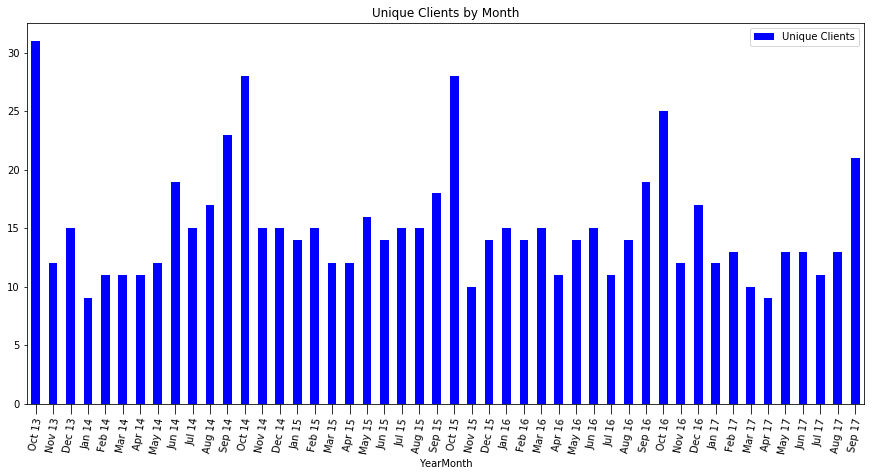

In [9]:
#Plot the number of unique customers for every month to look for seasonality


# Set size of plot
fig, ax = plt.subplots(figsize=(15,7))

# Set the type of plot to bar chart
year_month.plot(kind = 'bar', ax=ax,color='blue')

# Set the title
ax.set_title('Unique Clients by Month')

# Format the X-axis, tick marks, and labels
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(year_month.index.to_series().dt.strftime("%b %y")))

# Adjust the label rotation and label size as well as the tick mark size for X-axis
ax.xaxis.set_tick_params(rotation=80, labelsize=10, size=10)

In [10]:
# Average number of unique clients per month

final = pd.DataFrame(year_month.groupby(by=[year_month.index.month])['Unique Clients'].mean())
final.index = final.index.rename('Month')

final['PctTotalClients'] = ((final['Unique Clients']/data['Client Name'].nunique()*100).round(0)).astype(int)
final.sort_values('Unique Clients', ascending=False)

,Unique Clients,PctTotalClients
Month,,
10,28.00,80
9,20.25,58
6,15.25,44
12,15.25,44
8,14.75,42
5,13.75,39
2,13.25,38
7,13.00,37
1,12.50,36


# Results:

October has the highest average (and overall) number of unique clients contacted with 28 clients per month which is 80 percent of the total number of clients. Also, after plotting the unique clients contacted per month, there is a clear peak every October. The team should schedule the product upgrade announcement in October. 